#### Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

### Data Collection and Processing

In [8]:
# loading the csv data to a Pandas DataFrame
gold_data = pd.read_csv(r"C:\Users\Shaurya Tiwari\Desktop\Machine Learning\ML project-5\gld_price_data.csv")

In [10]:
gold_data

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.1800,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.2850,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.1670,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.0530,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.5900,1.557099
...,...,...,...,...,...,...
2285,5/8/2018,2671.919922,124.589996,14.060000,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.370000,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.410000,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.380000,15.5600,1.193118


In [11]:
gold_data.drop(['Date'], inplace=True, axis=1)

In [13]:
gold_data.shape

(2290, 5)

In [14]:
# getting some basic informations about the data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   SPX      2290 non-null   float64
 1   GLD      2290 non-null   float64
 2   USO      2290 non-null   float64
 3   SLV      2290 non-null   float64
 4   EUR/USD  2290 non-null   float64
dtypes: float64(5)
memory usage: 89.6 KB


In [15]:
# checking the number of missing values
gold_data.isnull().sum()

SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [16]:
# getting the statistical measures of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


### Correlation:

Positive Correlation
Negative Correlation

In [17]:
correlation = gold_data.corr()

<Axes: >

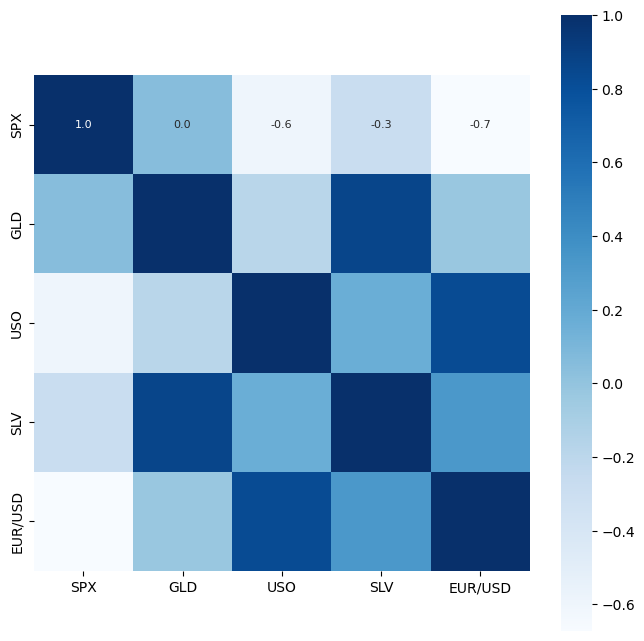

In [18]:
# constructing a heatmap to understand the correlatiom
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Blues')

In [19]:
# correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


C:\Users\Shaurya Tiwari\AppData\Local\Temp\ipykernel_7428\563101706.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'],color='green')
C:\Users\Shaurya Tiwari\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='GLD', ylabel='Density'>

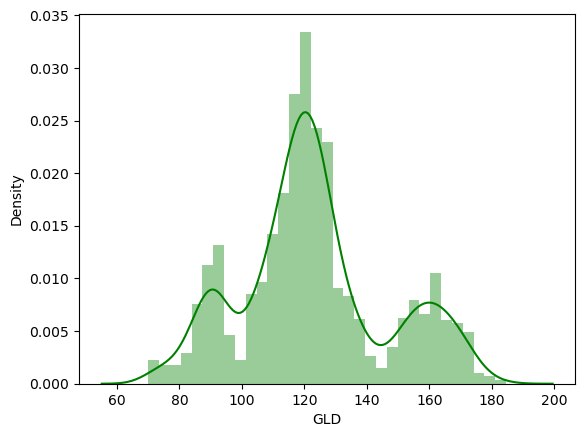

In [20]:
# checking the distribution of the GLD Price
sns.distplot(gold_data['GLD'],color='green')

### Splitting the Features and Target

In [22]:
X = gold_data.drop(['GLD'],axis=1)
Y = gold_data['GLD']

In [23]:
print(X)
print(Y)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]
0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


#### Splitting into Training data and Test Data

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

In [25]:
regressor = RandomForestRegressor(n_estimators=100)

In [26]:
# training the model
regressor.fit(X_train,Y_train)

RandomForestRegressor()

### Model Evaluation

In [29]:
# prediction on Test Data
test_data_prediction = regressor.predict(X_test)

In [30]:
print(test_data_prediction)

[168.44269944  81.89999998 115.93719989 127.61240083 120.93090118
 154.55219772 150.40219828 126.10310052 117.46589886 126.08620094
 116.57640077 171.9371005  141.46669927 167.53369825 115.02270029
 117.55120047 138.6330034  169.72750067 159.24780269 158.88719949
 155.25200051 125.14619973 175.91759928 157.08350316 125.21870042
  93.61320031  77.78349975 120.51700014 119.12969962 167.39909974
  88.39320085 124.78760032  91.31970045 117.7971002  121.12239915
 136.19660053 115.59140102 115.33140042 146.31289855 107.43790109
 104.10740239  87.35289789 126.57300049 117.56820006 154.25999911
 119.66560022 108.38589995 108.02399807  93.25580035 126.96809829
  74.96200046 113.69649922 121.22000008 111.27889908 118.80459901
 120.83859944 157.93510078 165.28570171 146.98679672  85.66649827
  94.17710056  86.95279893  90.44909994 119.03130059 126.42950096
 127.61319985 170.41510021 122.33429934 117.51439861  98.52320029
 168.58270172 143.18619819 131.7654032  121.17710241 121.17379918
 119.75230

In [34]:
#R square error

error_score = metrics.r2_score(Y_test, test_data_prediction)
print(error_score)

0.9890437653120848


### Compare the Actual Values and Predicted Values in a Plot

In [32]:
Y_test = list(Y_test)

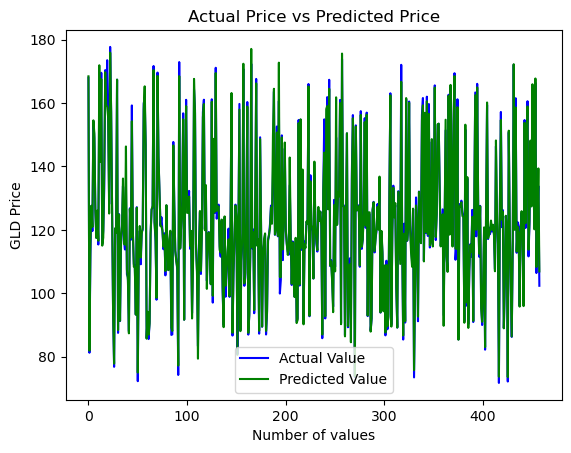

In [35]:
plt.plot(Y_test, color='blue', label='Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()